### The first step is to import the necessary library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Rescaling,Dropout,BatchNormalization,RandomZoom, RandomRotation,RandomTranslation
from tensorflow.keras.backend import expand_dims
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-24 22:44:24.851129: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 22:44:24.886301: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-24 22:44:24.887607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 22:44:25.738648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [3]:
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split = 0.2,
                             zoom_range = 0.1,
                             )

In [4]:
path_train = './raw_data/new_train/'
image_width,image_height = 50,50
batch_size = 128
step_per_epoch = int(87000/batch_size)

In [6]:
train_datagen = datagen.flow_from_directory(path_train,
                                            target_size=(image_width,image_height),
                                            shuffle=True,
                                            batch_size=batch_size,
                                            color_mode='grayscale',
                                            class_mode='categorical',
                                            subset = 'training'
                                            )

Found 69600 images belonging to 29 classes.


In [7]:
val_datagen = datagen.flow_from_directory(path_train,
                                            target_size=(image_width,image_height),
                                            shuffle=True,
                                            batch_size=batch_size,
                                            color_mode='grayscale',
                                            class_mode='categorical',
                                            subset = 'validation'
                                            )

Found 17400 images belonging to 29 classes.


In [8]:
label_mappings = train_datagen.class_indices
print(label_mappings)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}


In [9]:
def initialize_model1():

    model = Sequential()
    # Add an scaling layers to normalize the image
    # model.add(Rescaling(1./255,input_shape = (28,28,1)))

    # Add Data Augmentation layers
    # model.add(layers.RandomZoom(0.1))
    # model.add(layers.RandomTranslation(0.1, 0.1))
    # model.add(layers.RandomRotation(0.1))


    ### First Convolution & MaxPooling
    model.add(Conv2D(75, kernel_size = (3,3),input_shape = (50,50,1), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2),padding = 'same'))
    
    ### Second Convolution & MaxPooling
    model.add(Conv2D(50, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2),padding = 'same'))


    ### Third Convolution & MaxPooling
    model.add(Conv2D(25, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2),padding = 'same'))

    ### Flattening
    model.add(Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(Dense(512,activation = 'relu'))
    model.add(Dropout(0.3))
    
    ### Last layer - Classification Layer with 29 outputs
    model.add(Dense(29,activation = 'softmax'))
    
    ### Model compilation
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [10]:
cnn_model_01 = initialize_model1() 
cnn_model_01.summary()

2023-05-24 22:46:48.736208: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 22:46:48.737966: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 25, 25, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 50)       2

In [11]:
es = EarlyStopping(patience=3,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3,verbose=1)

In [12]:
history1 = cnn_model_01.fit(train_datagen,batch_size=batch_size, epochs=50, validation_data=val_datagen, verbose=1,callbacks=[es,reduce_lr])

Epoch 1/50


2023-05-24 22:47:04.190905: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


544/544 [==============================] - ETA: 0s - loss: 1.7506 - accuracy: 0.4661

2023-05-24 22:59:17.404668: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


544/544 [==============================] - 789s 1s/step - loss: 1.7506 - accuracy: 0.4661 - val_loss: 8.4168 - val_accuracy: 0.0696 - lr: 0.0010
Epoch 2/50
544/544 [==============================] - 841s 2s/step - loss: 0.7686 - accuracy: 0.7441 - val_loss: 1.7914 - val_accuracy: 0.4910 - lr: 0.0010
Epoch 3/50
544/544 [==============================] - 762s 1s/step - loss: 0.5098 - accuracy: 0.8282 - val_loss: 2.6829 - val_accuracy: 0.4249 - lr: 0.0010
Epoch 4/50
544/544 [==============================] - 825s 2s/step - loss: 0.3785 - accuracy: 0.8731 - val_loss: 1.6677 - val_accuracy: 0.5855 - lr: 0.0010
Epoch 5/50
544/544 [==============================] - 819s 2s/step - loss: 0.3037 - accuracy: 0.8974 - val_loss: 1.6180 - val_accuracy: 0.5774 - lr: 0.0010
Epoch 6/50
544/544 [==============================] - 754s 1s/step - loss: 0.2686 - accuracy: 0.9092 - val_loss: 2.0892 - val_accuracy: 0.5705 - lr: 0.0010
Epoch 7/50
544/544 [==============================] - 742s 1s/step - loss: 

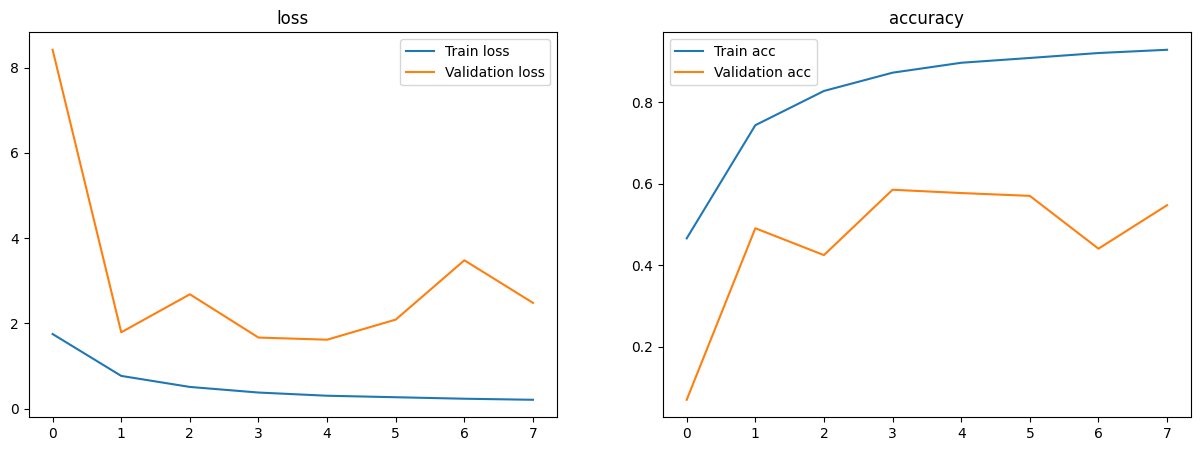

In [13]:
plot_history(history1)

In [38]:
from PIL import Image
correct = 0
num = 0
for name in label_mappings:
    try:
        file = Image.open(f'./raw_data/new_test/{name}_test.jpg').convert('L')
        img = np.asarray(file.resize([50,50]))
        ipt = expand_dims(np.resize(img,(50,50,1)),axis=0)
        y = np.argmax(cnn_model_01.predict(ipt))
        predicted_label = list(label_mappings.keys())[list(label_mappings.values()).index(y)]
        print(f'the {name} image is predicted to be {predicted_label}')
        if name == predicted_label:
            correct+=1
        num +=1
    except:
        continue
print(f'The accuracy is {correct/num:.02f}')

1/1 [==============================] - 0s 34ms/step
the A image is predicted to be T
1/1 [==============================] - 0s 26ms/step
the B image is predicted to be T
1/1 [==============================] - 0s 23ms/step
the C image is predicted to be T
1/1 [==============================] - 0s 23ms/step
the D image is predicted to be T
1/1 [==============================] - 0s 21ms/step
the E image is predicted to be A
1/1 [==============================] - 0s 25ms/step
the F image is predicted to be T
1/1 [==============================] - 0s 41ms/step
the G image is predicted to be nothing
1/1 [==============================] - 0s 34ms/step
the H image is predicted to be Y
1/1 [==============================] - 0s 29ms/step
the I image is predicted to be T
1/1 [==============================] - 0s 29ms/step
the J image is predicted to be Y
1/1 [==============================] - 0s 31ms/step
the K image is predicted to be T
1/1 [==============================] - 0s 34ms/step
the L i

In [25]:
file = Image.open(f'./raw_data/new_test/E_test.jpg').convert('L')

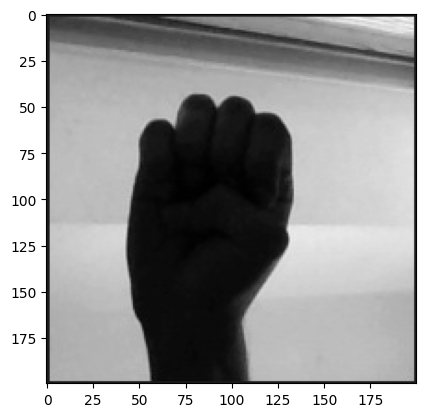

In [29]:
plt.imshow(file, cmap='gray')

In [27]:
img = np.asarray(file.resize([50,50]))

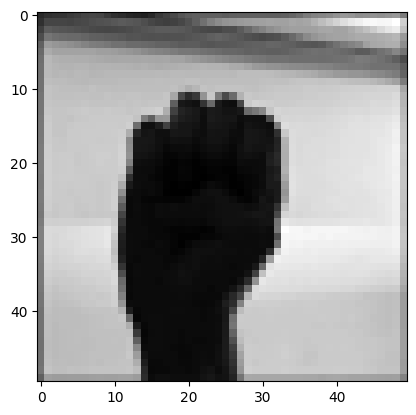

In [28]:
plt.imshow(img, cmap='gray')

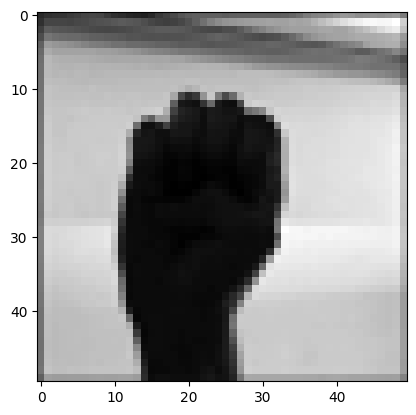

In [30]:
ipt = np.resize(img,(50,50,1))
plt.imshow(ipt,cmap='gray')

In [34]:
cnn_model_01.predict(expand_dims(ipt,axis=0))
# ipt.shape

1/1 [==============================] - 0s 95ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [ ]:
img = np.asarray(file.resize([50,50]))
ipt = np.resize(img,(50,50,1))
print(cnn_model_01.predict(ipt))
# y = np.argmax(cnn_model_01.predict(ipt))
print(f'the prediction is {y}')
predicted_label = list(label_mappings.keys())[list(label_mappings.values()).index(y)]
print(f'the {name} image is predicted to be {predicted_label}')

In [39]:
datagen2 = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split = 0.2,
                             zoom_range = 0.2,
                             )

In [51]:
train_datagen2 = datagen2.flow_from_directory(path_train,
                                            target_size=(image_width,image_height),
                                            shuffle=True,
                                            batch_size=batch_size,
                                            color_mode='grayscale',
                                            class_mode='categorical',
                                            subset = 'training'
                                            )

Found 69600 images belonging to 29 classes.


In [52]:
val_datagen2 = datagen2.flow_from_directory(path_train,
                                            target_size=(image_width,image_height),
                                            shuffle=True,
                                            batch_size=batch_size,
                                            color_mode='grayscale',
                                            class_mode='categorical',
                                            subset = 'validation'
                                            )

Found 17400 images belonging to 29 classes.


In [53]:
def initialize_model2():

    model = Sequential()
    # Add an scaling layers to normalize the image
    # model.add(Rescaling(1./255,input_shape = (28,28,1)))

    # Add Data Augmentation layers
    # model.add(layers.RandomZoom(0.1))
    # model.add(layers.RandomTranslation(0.1, 0.1))
    # model.add(layers.RandomRotation(0.1))


    ### First Convolution & MaxPooling
    model.add(Conv2D(75, kernel_size = (3,3),input_shape = (50,50,1), activation = 'relu', padding = 'same'))
    # model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2),padding = 'same'))
    
    ### Second Convolution & MaxPooling
    model.add(Conv2D(50, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(Dropout(0.2))
    # model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2),padding = 'same'))


    ### Third Convolution & MaxPooling
    model.add(Conv2D(25, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    # model.add(Dropout(0.2))
    # model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size = (2,2),padding = 'same'))

    ### Flattening
    model.add(Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(Dense(512,activation = 'relu'))
    model.add(Dropout(0.3))
    
    ### Last layer - Classification Layer with 29 outputs
    model.add(Dense(29,activation = 'softmax'))
    
    ### Model compilation
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [54]:
cnn_model_02 = initialize_model2() 
cnn_model_02.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 50, 75)        750       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 75)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 50)        33800     
                                                                 
 dropout_3 (Dropout)         (None, 25, 25, 50)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 50)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 25)       

In [55]:
history2 = cnn_model_02.fit(train_datagen2,batch_size=batch_size, epochs=50, validation_data=val_datagen2, verbose=1,callbacks=[es,reduce_lr])

Epoch 1/50


2023-05-25 06:16:15.748780: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


544/544 [==============================] - ETA: 0s - loss: 2.1812 - accuracy: 0.3472

2023-05-25 06:25:53.118373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


544/544 [==============================] - 624s 1s/step - loss: 2.1812 - accuracy: 0.3472 - val_loss: 2.0337 - val_accuracy: 0.3779 - lr: 0.0010
Epoch 2/50
544/544 [==============================] - 621s 1s/step - loss: 1.1044 - accuracy: 0.6433 - val_loss: 1.8045 - val_accuracy: 0.4391 - lr: 0.0010
Epoch 3/50
544/544 [==============================] - 503s 925ms/step - loss: 0.8099 - accuracy: 0.7335 - val_loss: 1.5357 - val_accuracy: 0.5259 - lr: 0.0010
Epoch 4/50
544/544 [==============================] - 538s 989ms/step - loss: 0.6456 - accuracy: 0.7837 - val_loss: 1.6295 - val_accuracy: 0.5154 - lr: 0.0010
Epoch 5/50
544/544 [==============================] - 575s 1s/step - loss: 0.5528 - accuracy: 0.8144 - val_loss: 1.3434 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 6/50
544/544 [==============================] - 665s 1s/step - loss: 0.4813 - accuracy: 0.8386 - val_loss: 1.3151 - val_accuracy: 0.6057 - lr: 0.0010
Epoch 7/50
544/544 [==============================] - 622s 1s/step - 

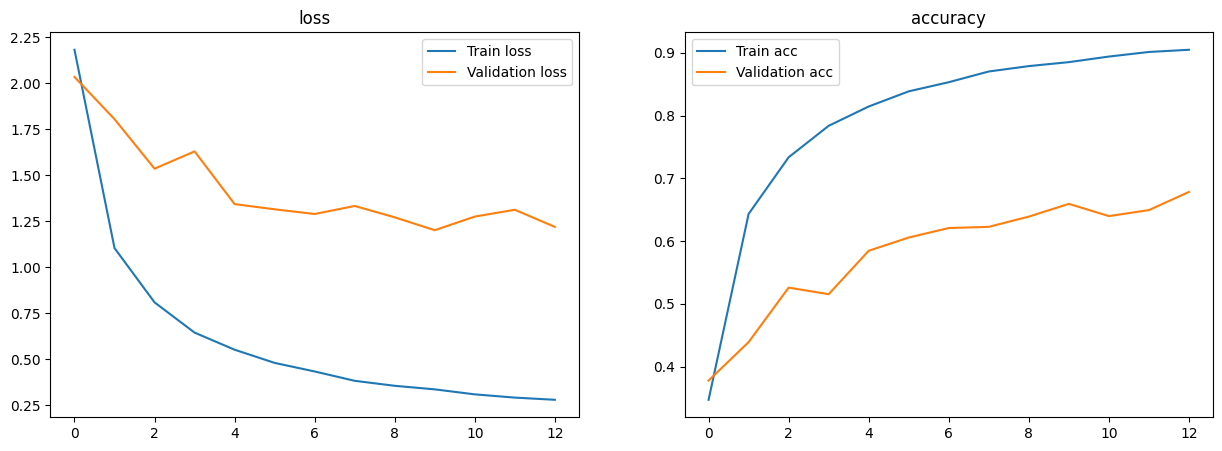

In [56]:
plot_history(history2)

In [57]:
correct = 0
num = 0
for name in label_mappings:
    try:
        file = Image.open(f'./raw_data/new_test/{name}_test.jpg').convert('L')
        img = np.asarray(file.resize([50,50]))
        ipt = expand_dims(np.resize(img,(50,50,1)),axis=0)
        y = np.argmax(cnn_model_02.predict(ipt))
        predicted_label = list(label_mappings.keys())[list(label_mappings.values()).index(y)]
        print(f'the {name} image is predicted to be {predicted_label}')
        if name == predicted_label:
            correct+=1
        num +=1
    except:
        continue
print(f'{correct} out of {num} are correct. The accuracy is {correct/num:.02f}')

1/1 [==============================] - 0s 74ms/step
the A image is predicted to be A
1/1 [==============================] - 0s 27ms/step
the B image is predicted to be B
1/1 [==============================] - 0s 33ms/step
the C image is predicted to be C
1/1 [==============================] - 0s 29ms/step
the D image is predicted to be D
1/1 [==============================] - 0s 29ms/step
the E image is predicted to be A
1/1 [==============================] - 0s 31ms/step
the F image is predicted to be F
1/1 [==============================] - 0s 33ms/step
the G image is predicted to be nothing
1/1 [==============================] - 0s 33ms/step
the H image is predicted to be W
1/1 [==============================] - 0s 35ms/step
the I image is predicted to be L
1/1 [==============================] - 0s 32ms/step
the J image is predicted to be Y
1/1 [==============================] - 0s 33ms/step
the K image is predicted to be V
1/1 [==============================] - 0s 31ms/step
the L i

In [58]:
cnn_model_02.save('./cnn_model/new_data_cnn_model50x50_01')

2023-05-25 08:27:43.767944: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,25,25,50]
	 [[{{node inputs}}]]
2023-05-25 08:27:43.794620: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,512]
	 [[{{node inputs}}]]
2023-05-25 08:27:44.089609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,25,25,50]
	 [[{{node inputs}}]]
2023-0

INFO:tensorflow:Assets written to: ./cnn_model/new_data_cnn_model50x50_01/assets


INFO:tensorflow:Assets written to: ./cnn_model/new_data_cnn_model50x50_01/assets


In [75]:
for letter in ['a','b','c','d','e']:
    file = Image.open(f'test_image/{letter}.jpg').convert('L')
    img = np.asarray(file.resize((50,50)))
    img = expand_dims(np.resize(img,(50,50,1)),axis=0)
    y = np.argmax(cnn_model_02.predict(img))
    predicted_label = list(label_mappings.keys())[list(label_mappings.values()).index(y)]
    print(f'the file {letter}.jpg is predicted to have letter {predicted_label}')

1/1 [==============================] - 0s 20ms/step
the file a.jpg is predicted to have letter nothing
1/1 [==============================] - 0s 21ms/step
the file b.jpg is predicted to have letter nothing
1/1 [==============================] - 0s 26ms/step
the file c.jpg is predicted to have letter nothing
1/1 [==============================] - 0s 24ms/step
the file d.jpg is predicted to have letter nothing
1/1 [==============================] - 0s 22ms/step
the file e.jpg is predicted to have letter nothing


In [43]:
file1 = Image.open(f'./raw_data/new_test/M_test.jpg').convert('L')
file2 = Image.open(f'./raw_data/new_test/M_test.jpg')

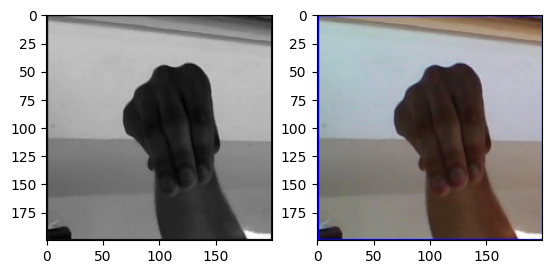

In [46]:
plt.subplot(1,2,1)
plt.imshow(file1, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(file2)

plt.show()

In [49]:
img1 = np.asarray(file1.resize([50,50]))
img2 = np.asarray(file2.resize([50,50]))

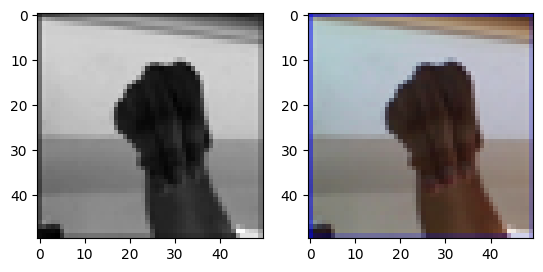

In [50]:
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img2)

plt.show()

In [61]:
test1 = expand_dims(np.resize(img1,(50,50,1)),axis=0)

In [63]:
res = cnn_model_02.predict(test1)

1/1 [==============================] - 0s 48ms/step


In [64]:
result, prob = np.argmax(res),np.max(res)
print(result, prob)

12 0.9038155


In [65]:
label_mappings[12]

KeyError: 12